Phân tích và trực quan hóa doanh số trò chơi điện tử

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/phantichdulieu/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.shape

(16598, 11)

Dữ liệu trò chơi điện tử.

In [ ]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

*   Xóa một số dữ liệu không đầy đủ. Có thể thấy, từ năm 2016, dữ liệu vẫn chưa được hoàn thành đầy đủ.

*   Giúp chúng ta phân tích tốt hơn. Dữ liệu không đầy đủ cản trở việc phân tích.

In [ ]:
data.shape

(16250, 11)

*   Tổng cộng 11 cột và 16250 hàng.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Các trường và kiểu dữ liệu của chúng là:

*   Rank - Xếp hạng tổng doanh thu, số nguyên

*   Name - Tên trò chơi

*   Platform - Nền tảng phát hành trò chơi (ví dụ: PC, PS4, v.v.), đối tượng

*   Year - Năm phát hành trò chơi, float

*   Genre - Thể loại trò chơi, đối tượng

*   Publisher - Nhà phát hành trò chơi, đối tượng
*   NA_Sales - Doanh số bán hàng ở Bắc Mỹ (tính bằng triệu), float


*   EU_Sales - Doanh số bán hàng ở Châu Âu (triệu), float


*   JP_Sales - Doanh số bán hàng ở Nhật Bản (triệu), float


*   Other_Sales - Doanh số bán hàng ở phần còn lại của thế giới (tính bằng triệu), float


*   Global_Sales - Tổng doanh số bán hàng trên toàn thế giới, float

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Không còn thiếu nhiều giá trị, không mất nhiều thông tin.

1. Thể loại game nào được làm nhiều nhất?

In [ ]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

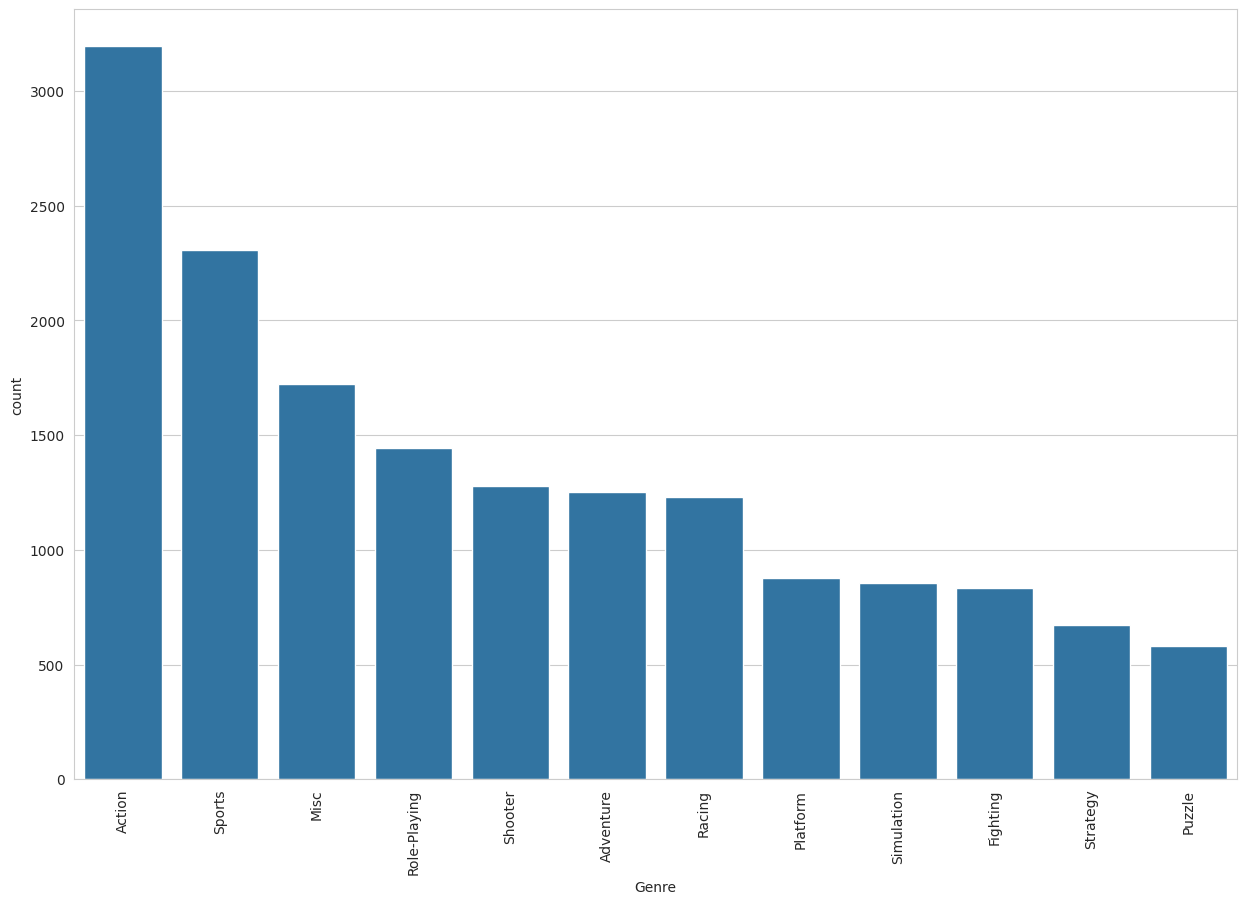

In [ ]:
\4\plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Những thể loại như Action, Sports, Misc được làm nhiều nhất với số lượng rất lớn, chiếm ưu thế hơn hẳn những cái tên còn lại. Qua đó cũng biết được sở thích của khách hàng.(có 3196 games Action, 2308 games Sports và 1721 games Misc được phát hành)

2. Năm nào có nhiều game được phát hành nhất?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  T

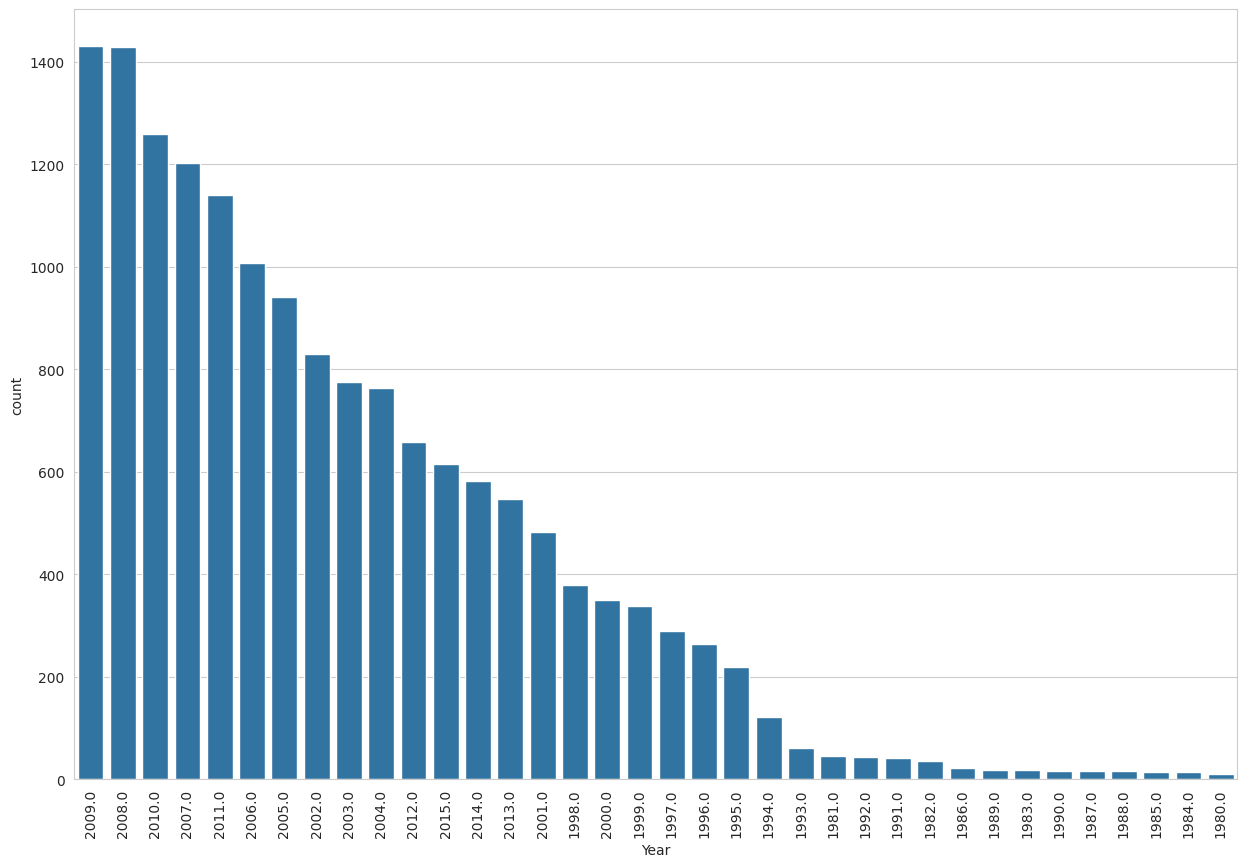

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [ ]:
data.groupby(by=['Year'])['Name'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
Name: Name, dtype: int64

Các năm 2009, 2008, 2010, 2007 và 2011 là những năm có nhiều tựa game được phát hành nhất. Đây cũng có thể là những năm bùng nổ và phát triển của ngành công nghiệp game vì cho ra nhiều tựa game nhất. Cụ thể:
1.   2009.0 -> 1431
2.   2008.0 -> 1428
3.   2010.0 -> 1259
4.   2007.0 -> 1202
5.   2011.0 -> 1139

3. Top thể loại được phát hành nhiều nhất trong 5 năm.

([0, 1, 2, 3, 4],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

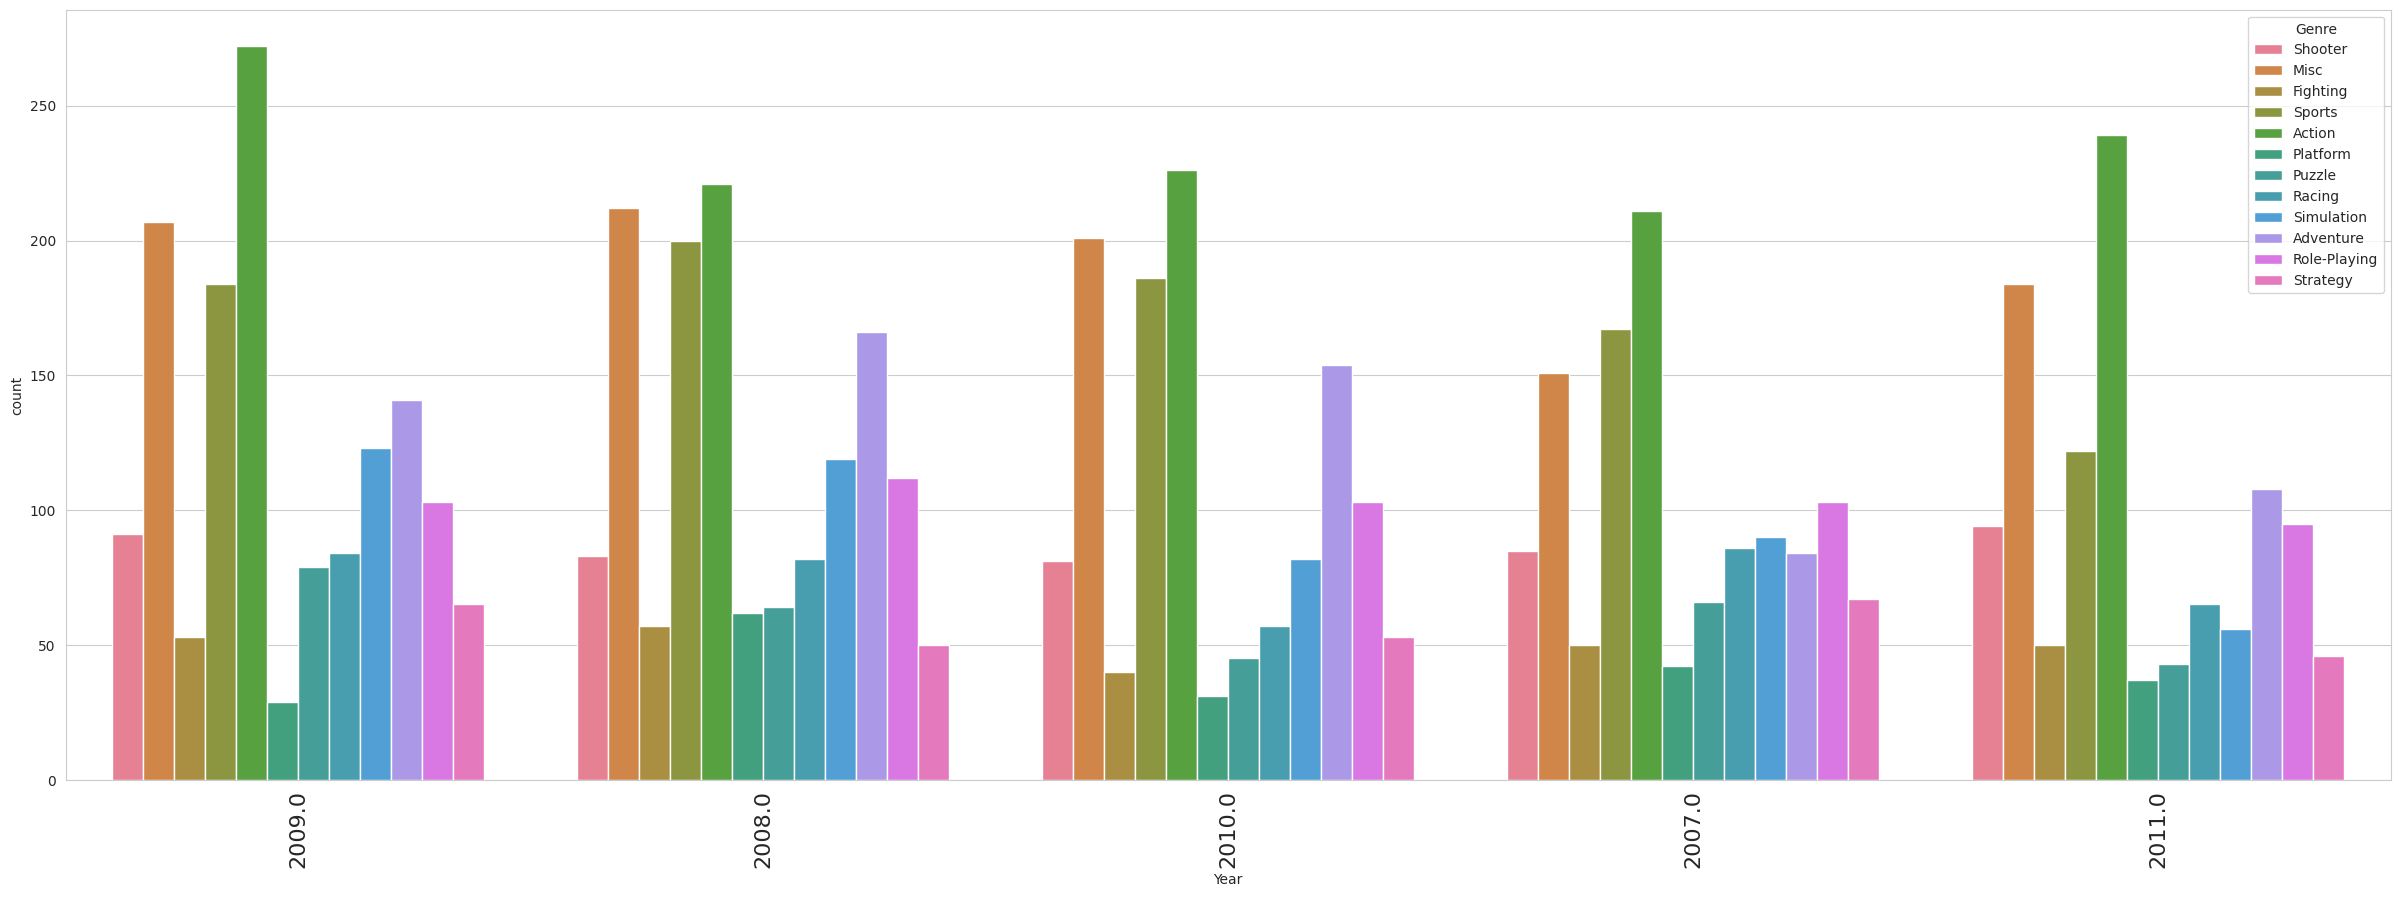

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Như ta có thể thấy theo hình trên thể loại action luôn đứng top đầu trong các thể loại của năm.

4. Năm nào có doanh thu cao nhất trên toàn thế giới?

In [ ]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  T

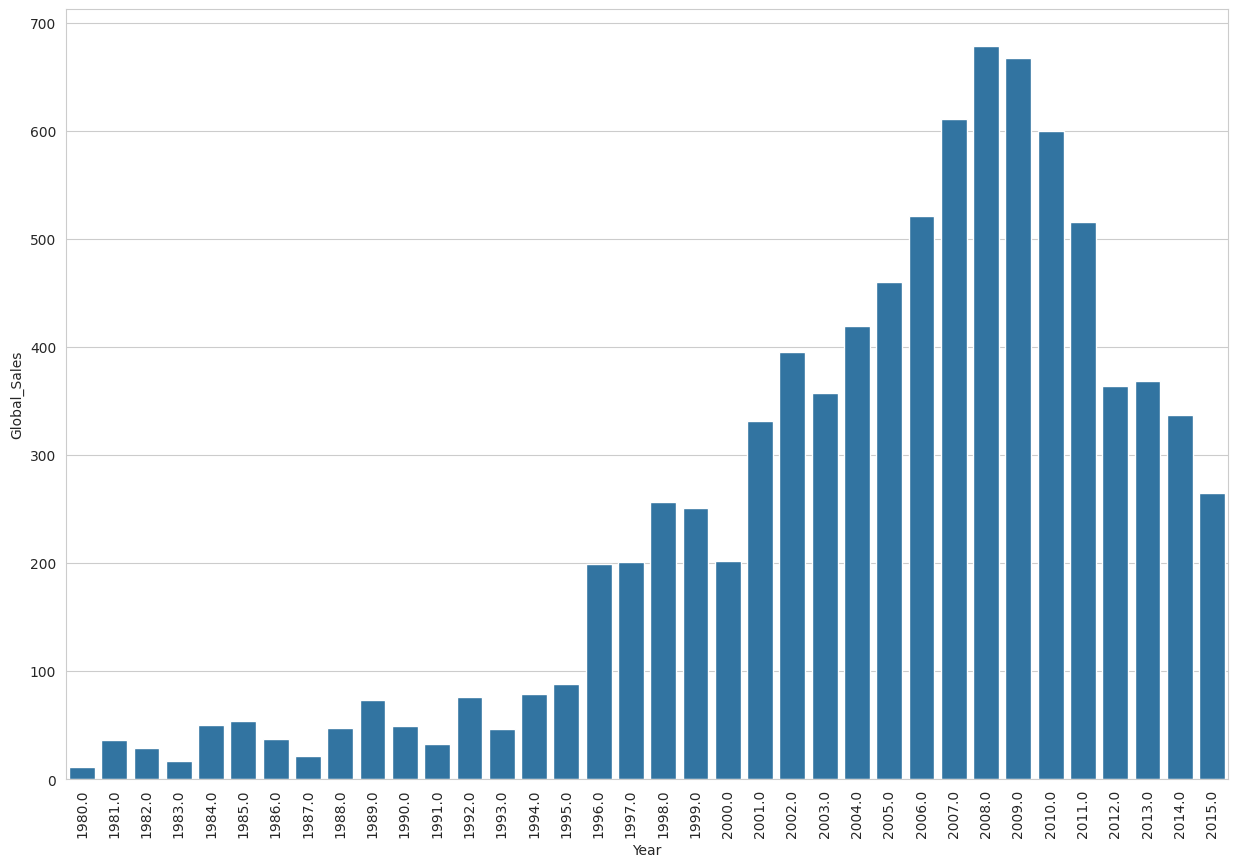

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

In [ ]:
data_year.sort_values(by=['Global_Sales'], ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


*   Ta có thể thấy tuy 2006 không nằm trong top 5 năm có nhiều game được phát hành nhưng lại nằm trong top 5 năm có doanh thu cao nhất trên toàn thế giới.Cụ thể:
1.   2008 678.90
2.   2009 667.30
3.   2007 611.13
4.   2010 600.45
5.   2006 521.04


5. Game thuộc thể loại nào được phát hành nhiều nhất trong một năm?

In [ ]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [ ]:
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3
5,1985.0,Puzzle,4
6,1986.0,Platform,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


In [ ]:
genre = year_max_genre['Genre'].values

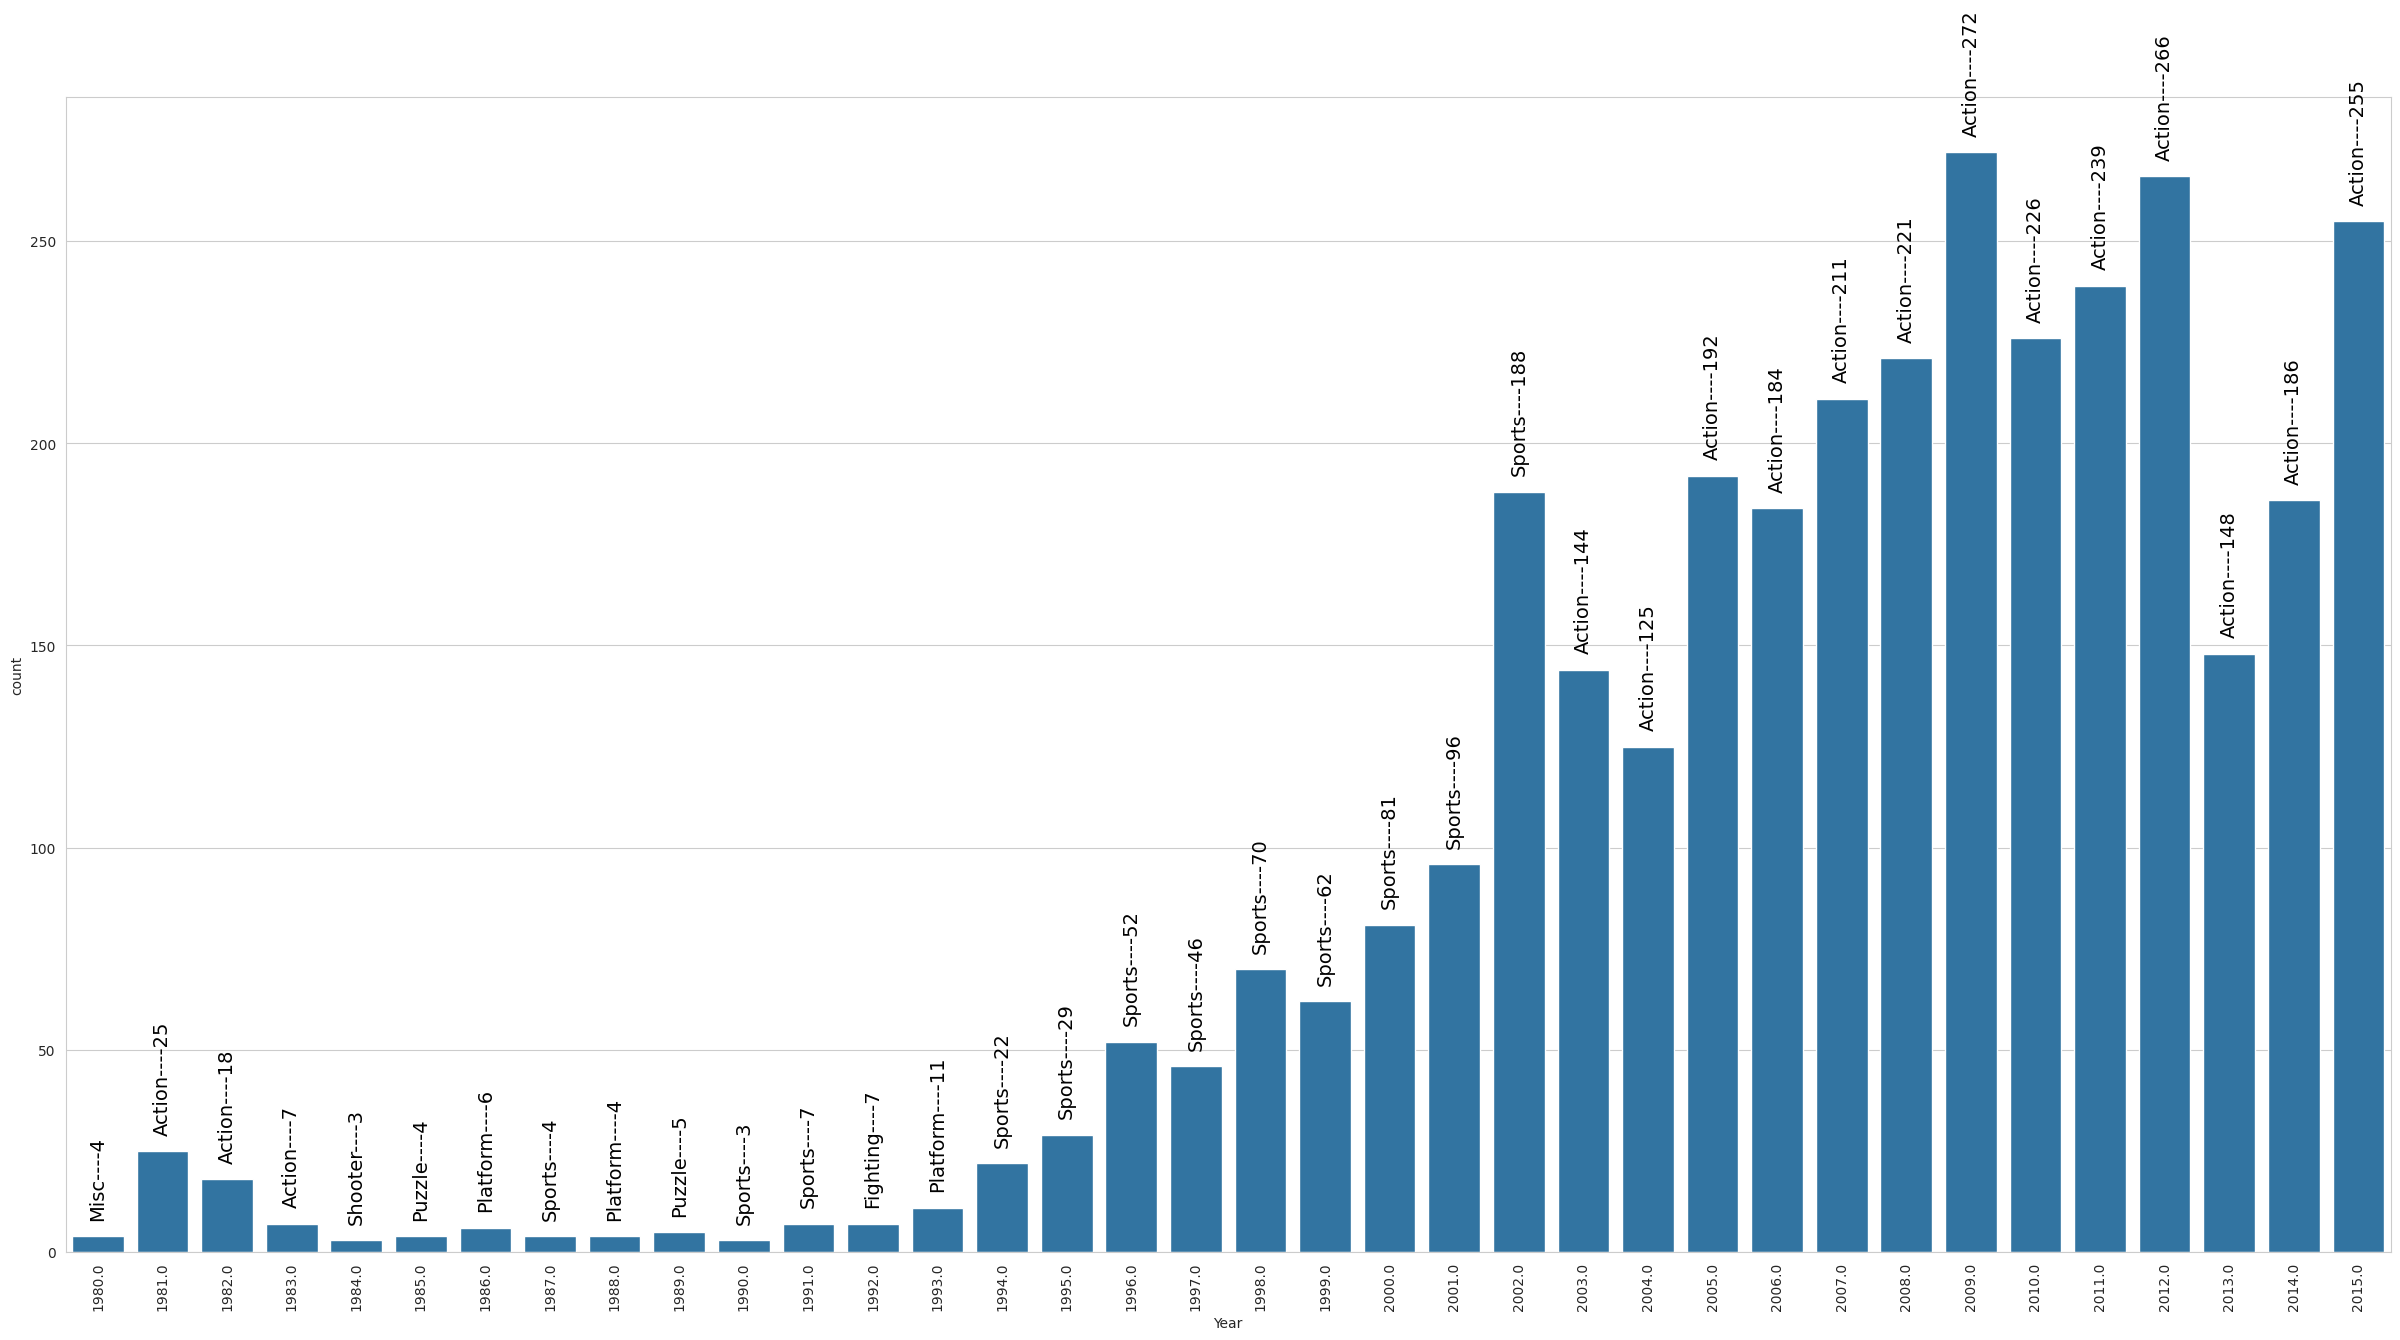

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

Thể loại game Action vẫn chiếm ưu thế và có kết quả tốt nhất là năm 2009 và đổ về những năm sau ta thấy có sự chững lại rồi có sụt giảm. Nhưng vẫn là thể loại được ưa thích nhất. Sau đó là Sport cũng từng là thể loại được rất ưa chuộng. Cụ thể:

*   2009 Action ---> 272 và 2012 Action ---> 266 games được phát hành.

6. Trò chơi thể loại nào bán được nhiều nhất trong một năm?

In [ ]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [ ]:
year_sale_max

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


In [ ]:
genre = year_sale_max['Genre']

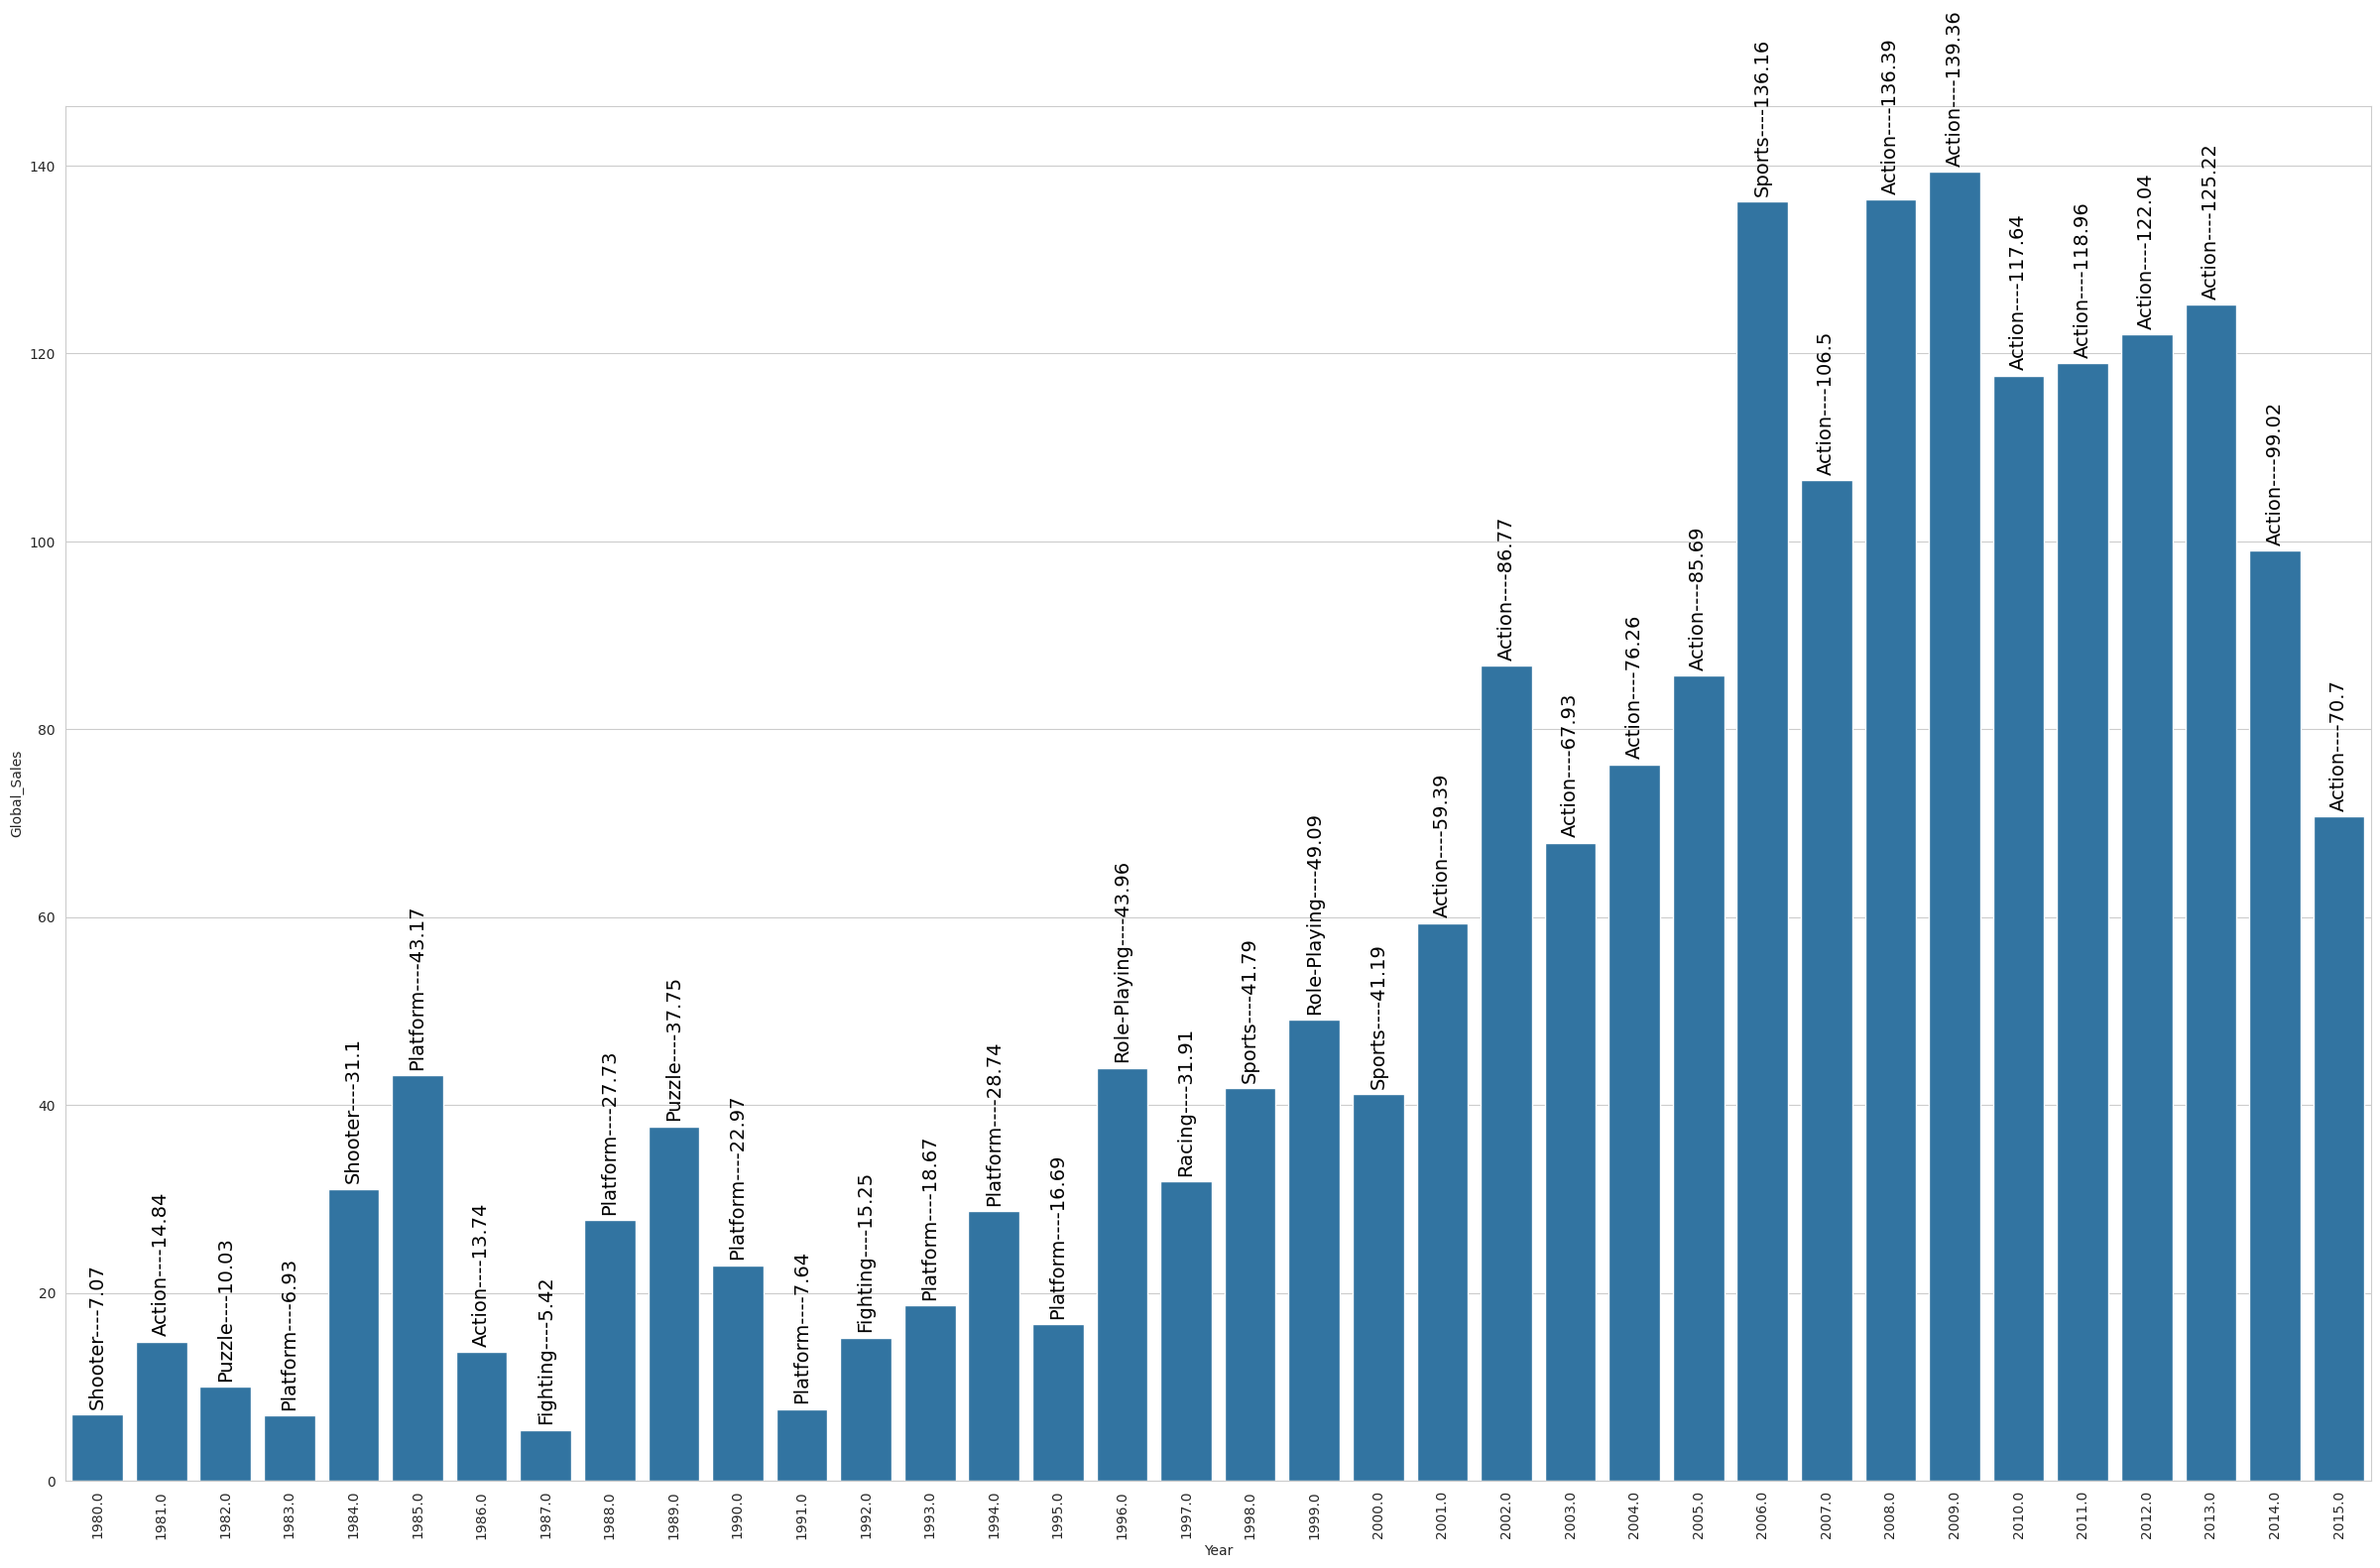

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Thể loại game Action không tự nhiên được phát hành nhiều như thế. Ta thấy biểu đồ này thấy được lượt bán nhiều nhất vẫn là Action thể hiện thị yếu mua game của người dùng ảnh hưởng tới lối đi của nhà sản xuất. Cụ thể theo doanh số trên toàn thế giới:
*   2009 Action ---> 139.36 million và 2008 Action ---> 136.39 miliion .



7. Thể loại game nào có doanh số cao nhất toàn cầu

In [ ]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
data_genre

,Genre,Global_Sales
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30
3,Misc,808.79
6,Racing,730.40
2,Fighting,445.05
9,Simulation,391.52
5,Puzzle,244.95


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

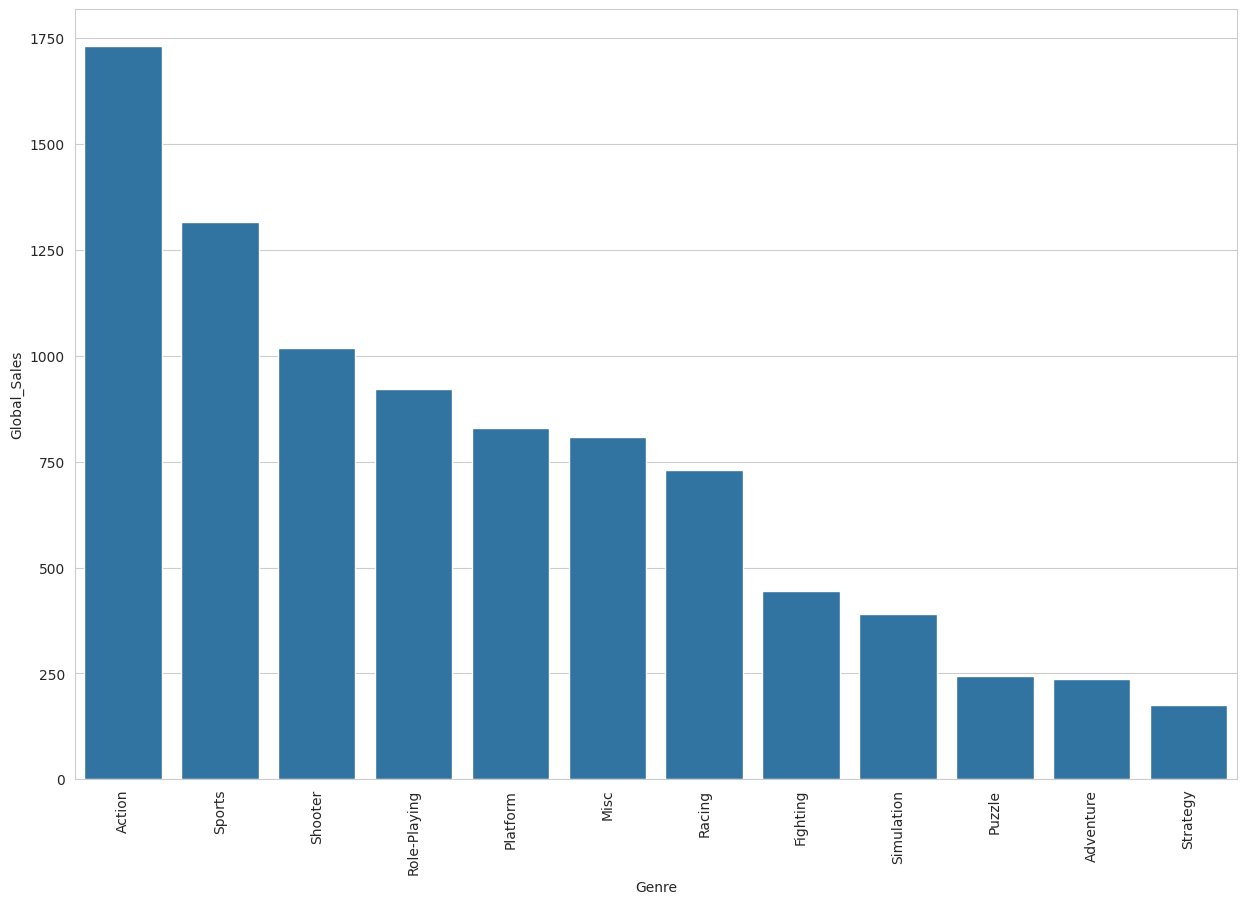

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

Action và Sports vẫn luôn đứng đầu sau đó là Shooter. Vì nguồn cầu lớn về những thể loại trên dẫn đến các nhà sản xuất tập trung phát triển cho ra những sản phẩm tốt nhất để cạnh tranh. Qua đó tăng giá bán sản phẩm. Cụ thể:

*   Action -> 1731.26 triệu
*   Sports -> 1316.33 triệu
*   Shooter -> 1019.15 triệu
*   Role-Playing -> 920.57 triệu
*   Plattform -> 829.30 triệu



8. Nền tảng nào có doanh số cao nhất toàn cầu

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

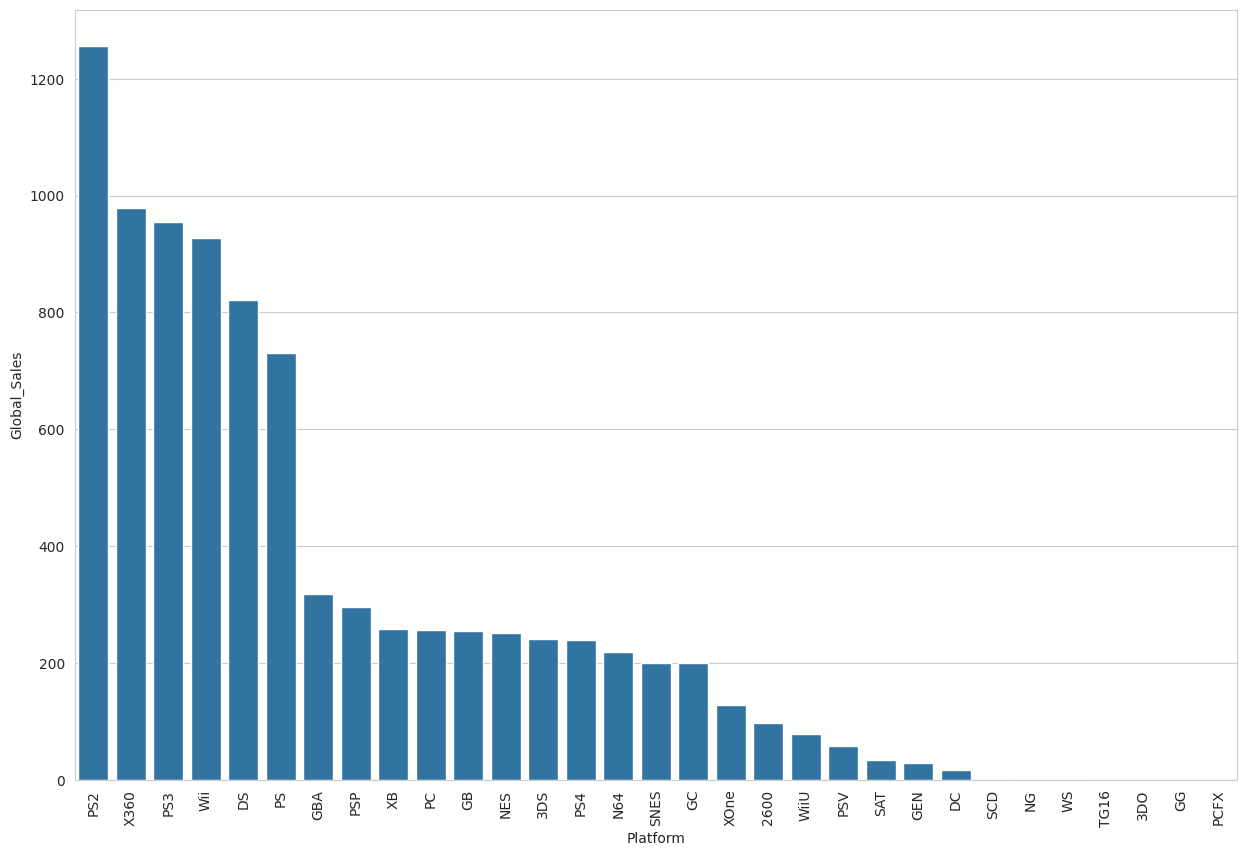

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

Những nền tảng doanh số cao nhất là PS2, X360, PS3. Và các nền tảng này là những nền tảng trong những năm thị trường game phát triển nhất. Nên doanh số rất cao.

9. So sánh doanh số theo thể loại của các khu vực

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Adventure,105.46,63.74,51.10,16.70
Fighting,221.99,100.17,86.71,36.22
Misc,410.02,215.89,106.95,75.29
Platform,446.26,200.76,130.66,51.28
Puzzle,123.78,50.78,57.31,12.55
Racing,359.09,237.25,56.68,77.08
Role-Playing,325.89,186.77,348.64,59.17
Shooter,575.16,305.57,37.67,100.27


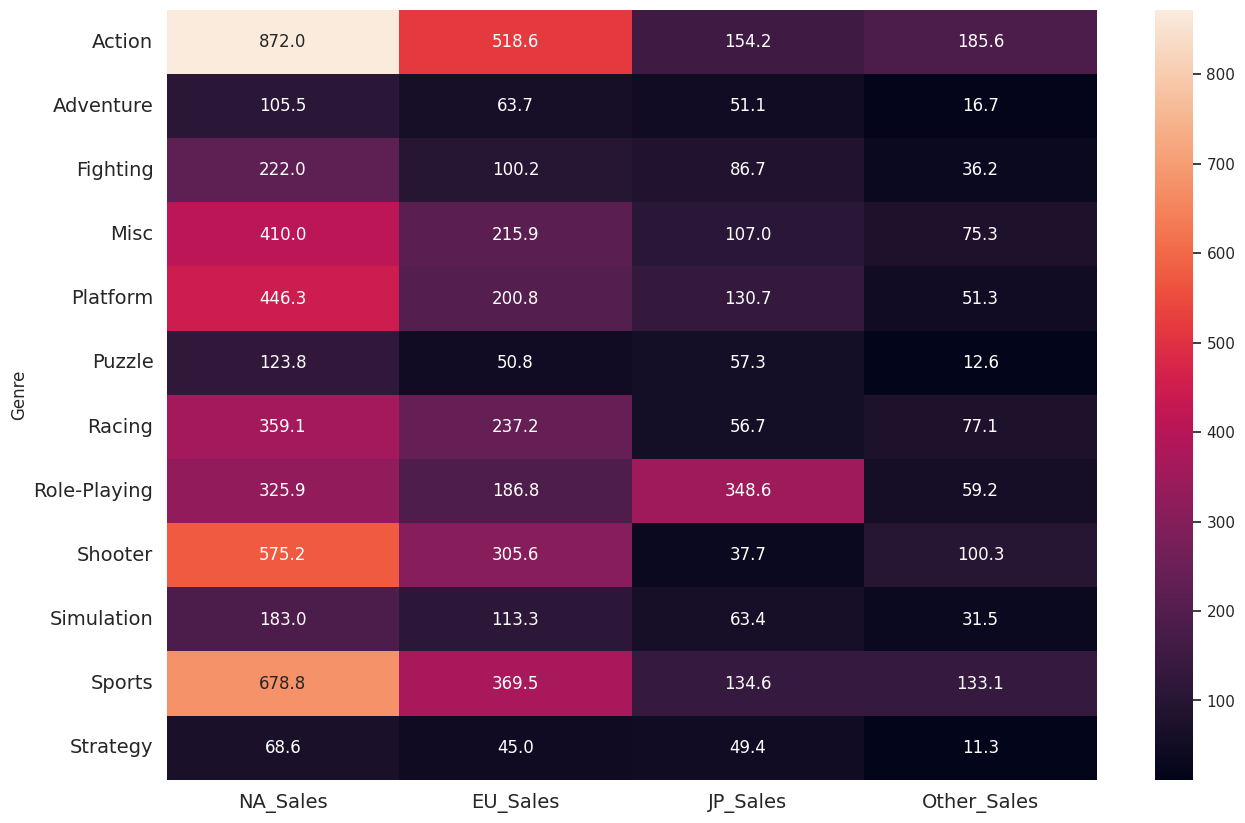

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


Action, Sport là những thể loại rất được ưa chuộng ở hầu hết các khu vực và có doanh số cao nhất. Thì ở Nhật bản ( JP_sales ) lại ưa chuộng thể loại Role-Playing hơn và doanh số Role-Playing cũng là cao nhất (348.64 triệu).

<Axes: xlabel='Genre', ylabel='Sale_Price'>

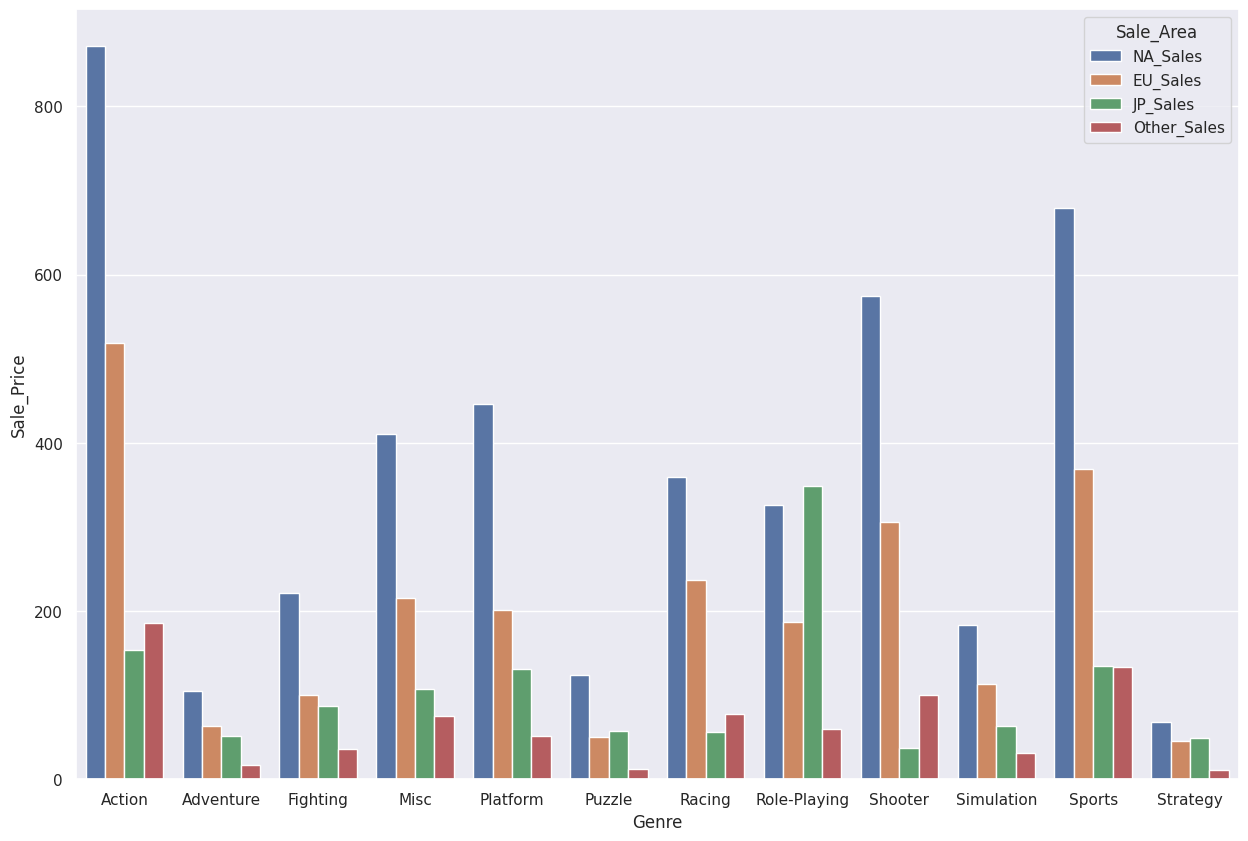

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

Action, sport và Shooter có doanh thu cao hơn so với những thể loại khác và khu vực Bắc Mỹ (NA_sales) luôn có doanh số bán hàng cao nhất sau đó là Châu Âu (EU_sales). Chứng tỏ họ rất yêu thích trò chơi điện tử.

10. So sánh doanh số theo nền tảng của các khu vực

In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [ ]:
comp_table = comp_map.reset_index()
comp_table

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,871.96,518.64,154.15,185.55
1,Adventure,105.46,63.74,51.10,16.70
2,Fighting,221.99,100.17,86.71,36.22
3,Misc,410.02,215.89,106.95,75.29
4,Platform,446.26,200.76,130.66,51.28
5,Puzzle,123.78,50.78,57.31,12.55
6,Racing,359.09,237.25,56.68,77.08
7,Role-Playing,325.89,186.77,348.64,59.17
8,Shooter,575.16,305.57,37.67,100.27
9,Simulation,183.04,113.29,63.40,31.50


In [ ]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


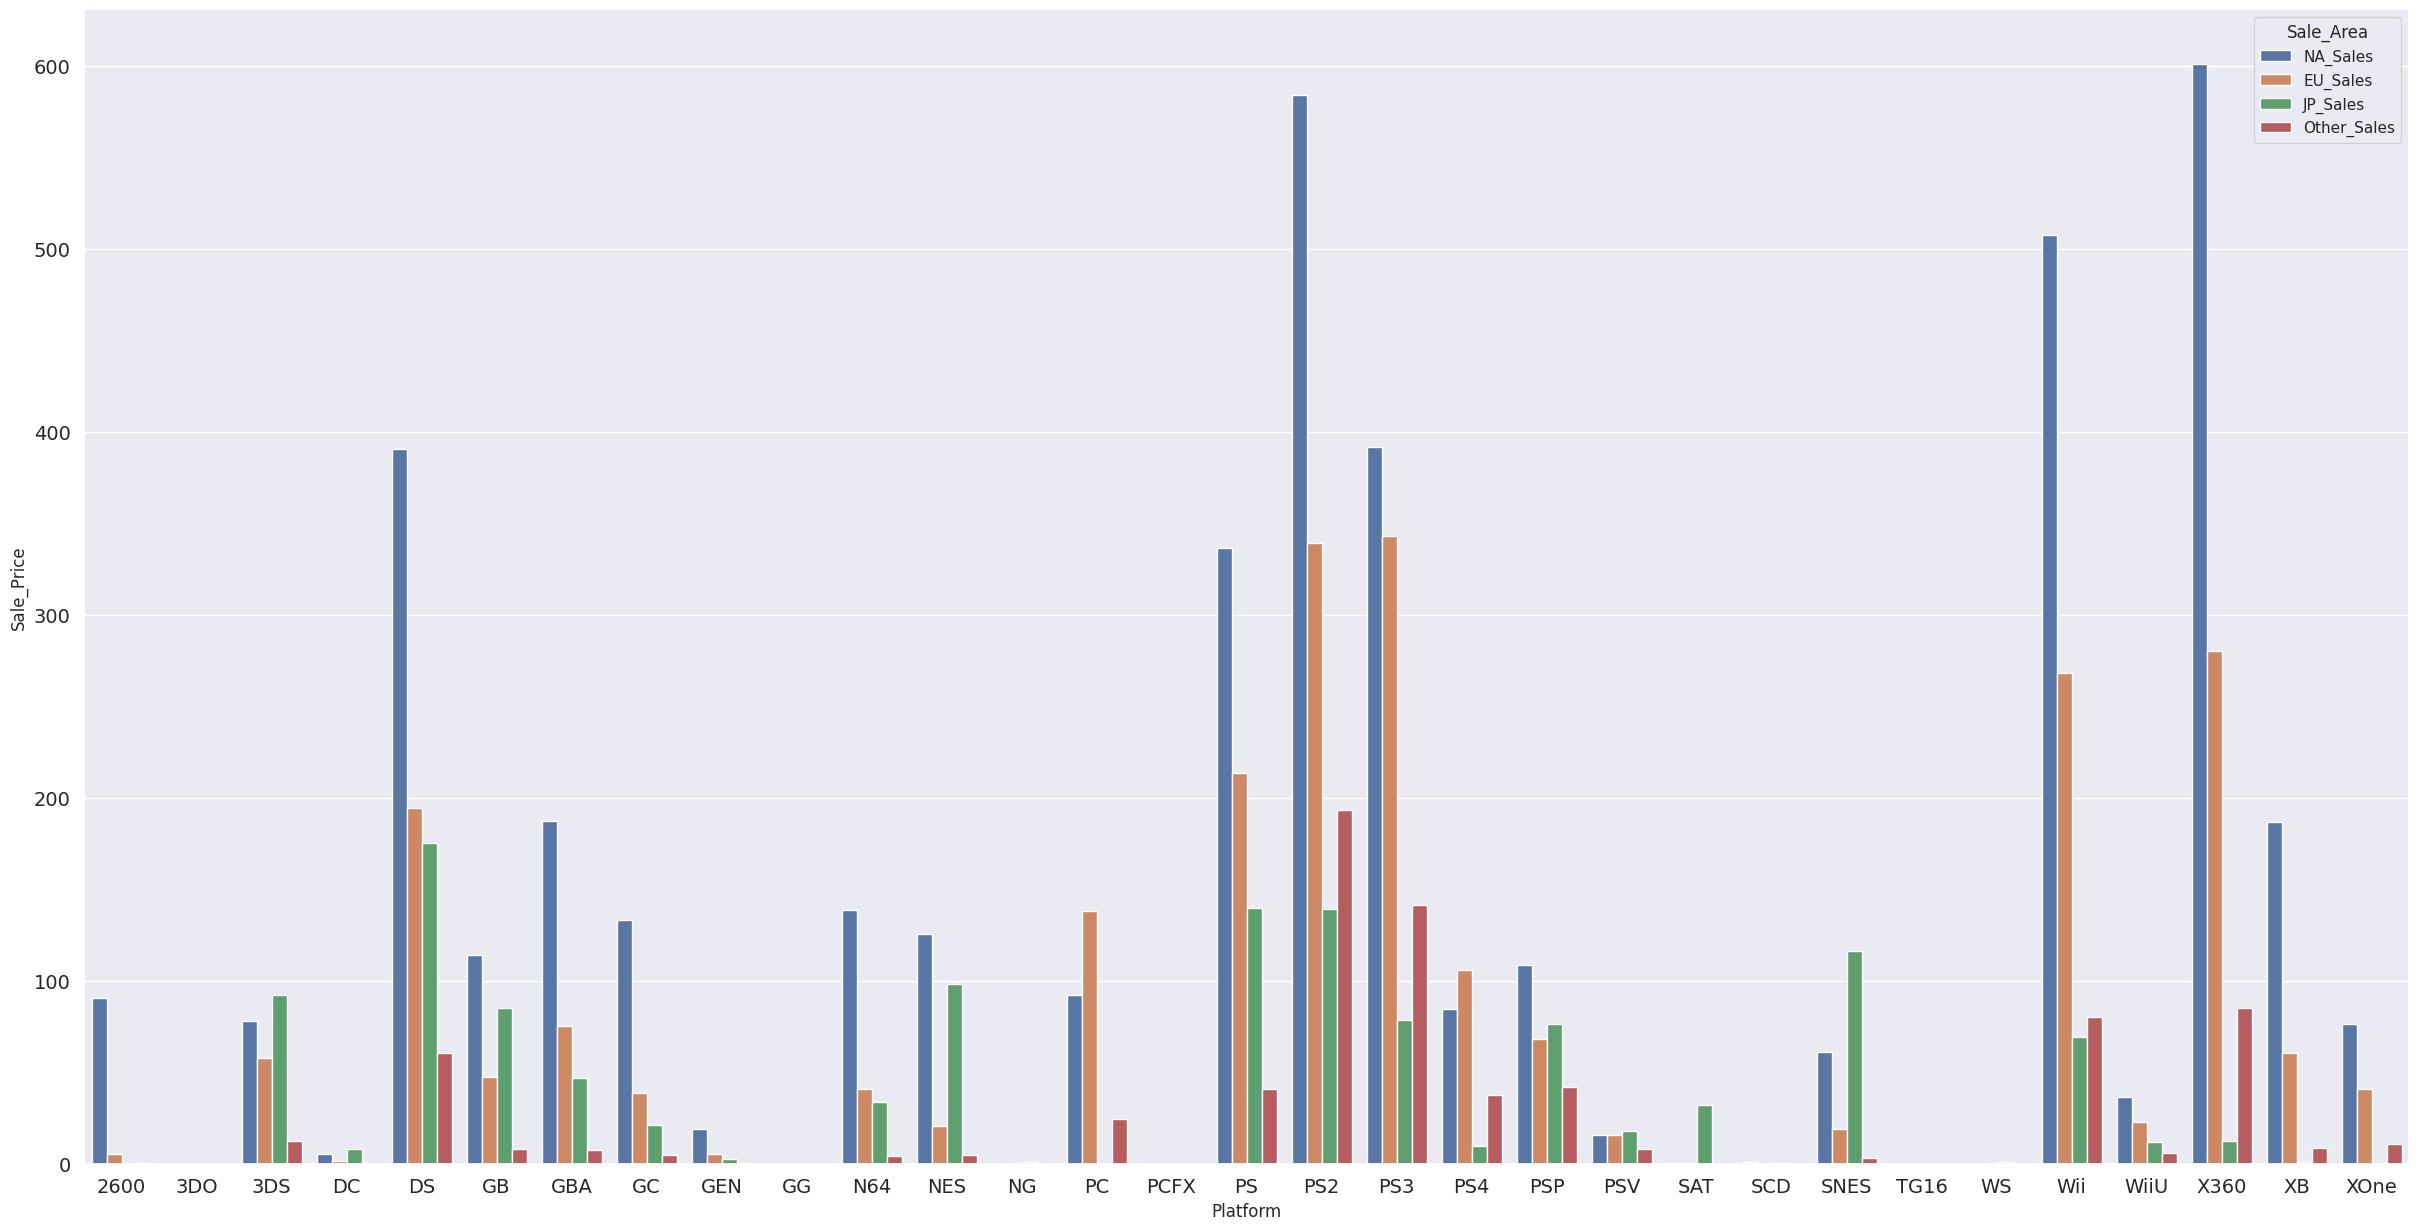

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

X360, PS2 và Wii đang dẫn đầu thị trường và Bắc Mỹ luôn đứng đầu. Thị trường Bắc Mỹ là thị trường lớn của các nhà sản xuất trò chơi điện tử.

11. Top 20 nhà phát hành nhiều game nhất

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

In [ ]:
top_publisher

,Publisher,Year
0,Electronic Arts,1319
1,Activision,952
2,Ubisoft,904
3,Namco Bandai Games,888
4,Konami Digital Entertainment,815
5,THQ,712
6,Nintendo,686
7,Sony Computer Entertainment,677
8,Sega,622
9,Take-Two Interactive,400


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

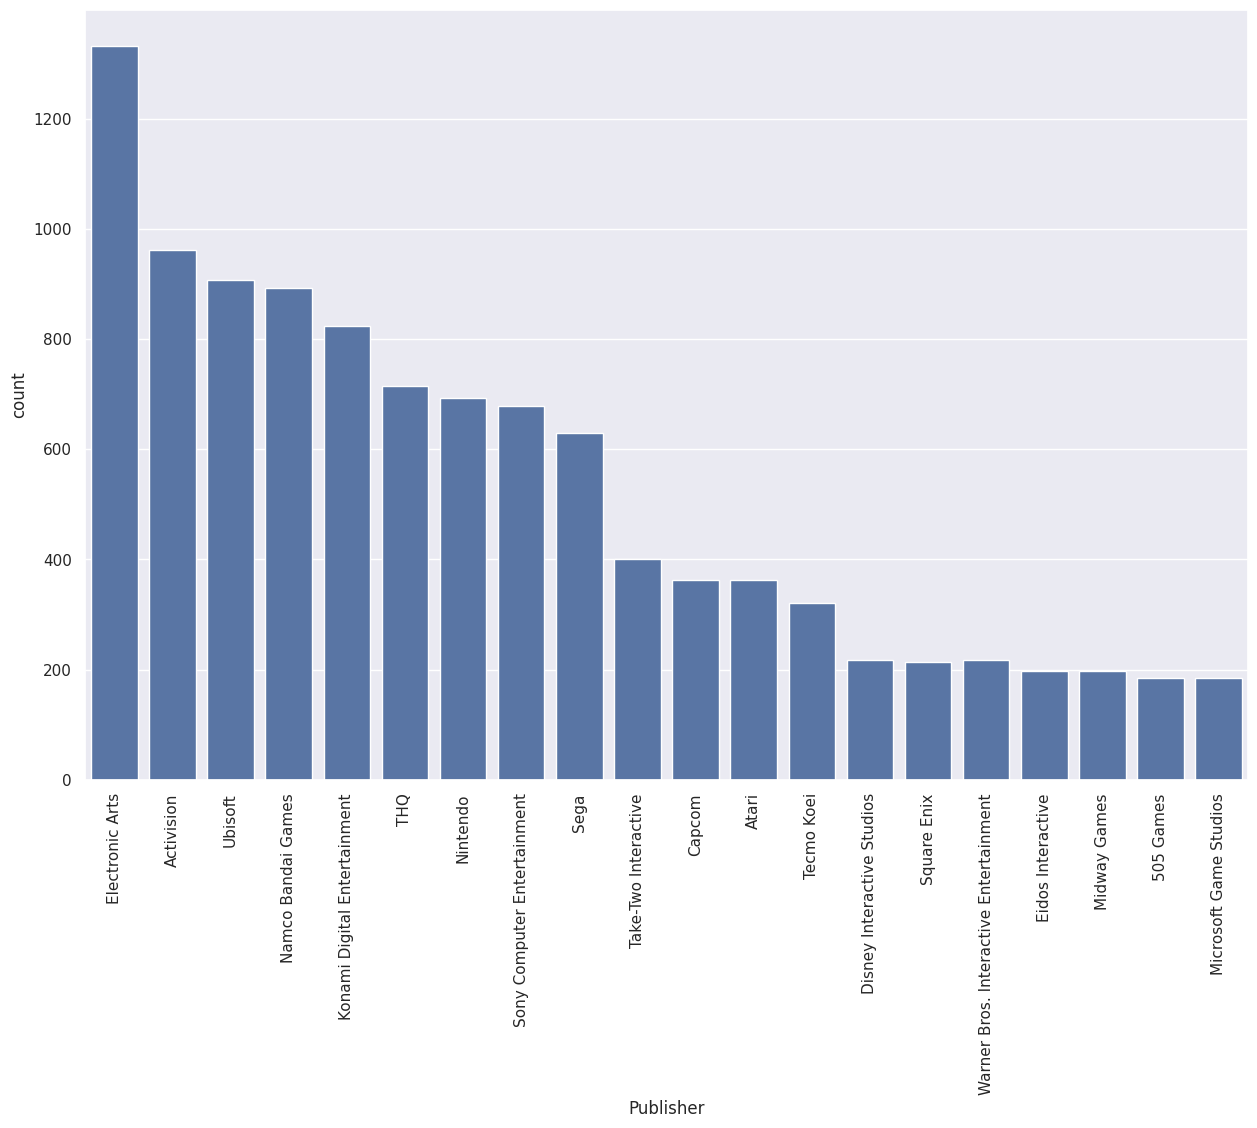

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

Ta có EA ( Electronic Arts) là nhà phát hành nhiều game nhất. Sau đó là những cái tên như Activison, Ubisoft.

*   Electronic Arts -> 1319
*   Activision -> 952
*   Ubisoft -> 904
*   Namco Bandai games -> 888
*   Konami Digital Entertainment -> 815



12.	Doanh thu cao nhất toàn cầu theo nhà phát hành

In [ ]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

In [ ]:
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1783.09
1,Electronic Arts,1098.07
2,Activision,723.79
3,Sony Computer Entertainment,600.94
4,Ubisoft,464.67
5,Take-Two Interactive,396.65
6,THQ,340.77
7,Konami Digital Entertainment,282.43
8,Sega,272.18
9,Namco Bandai Games,247.60


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

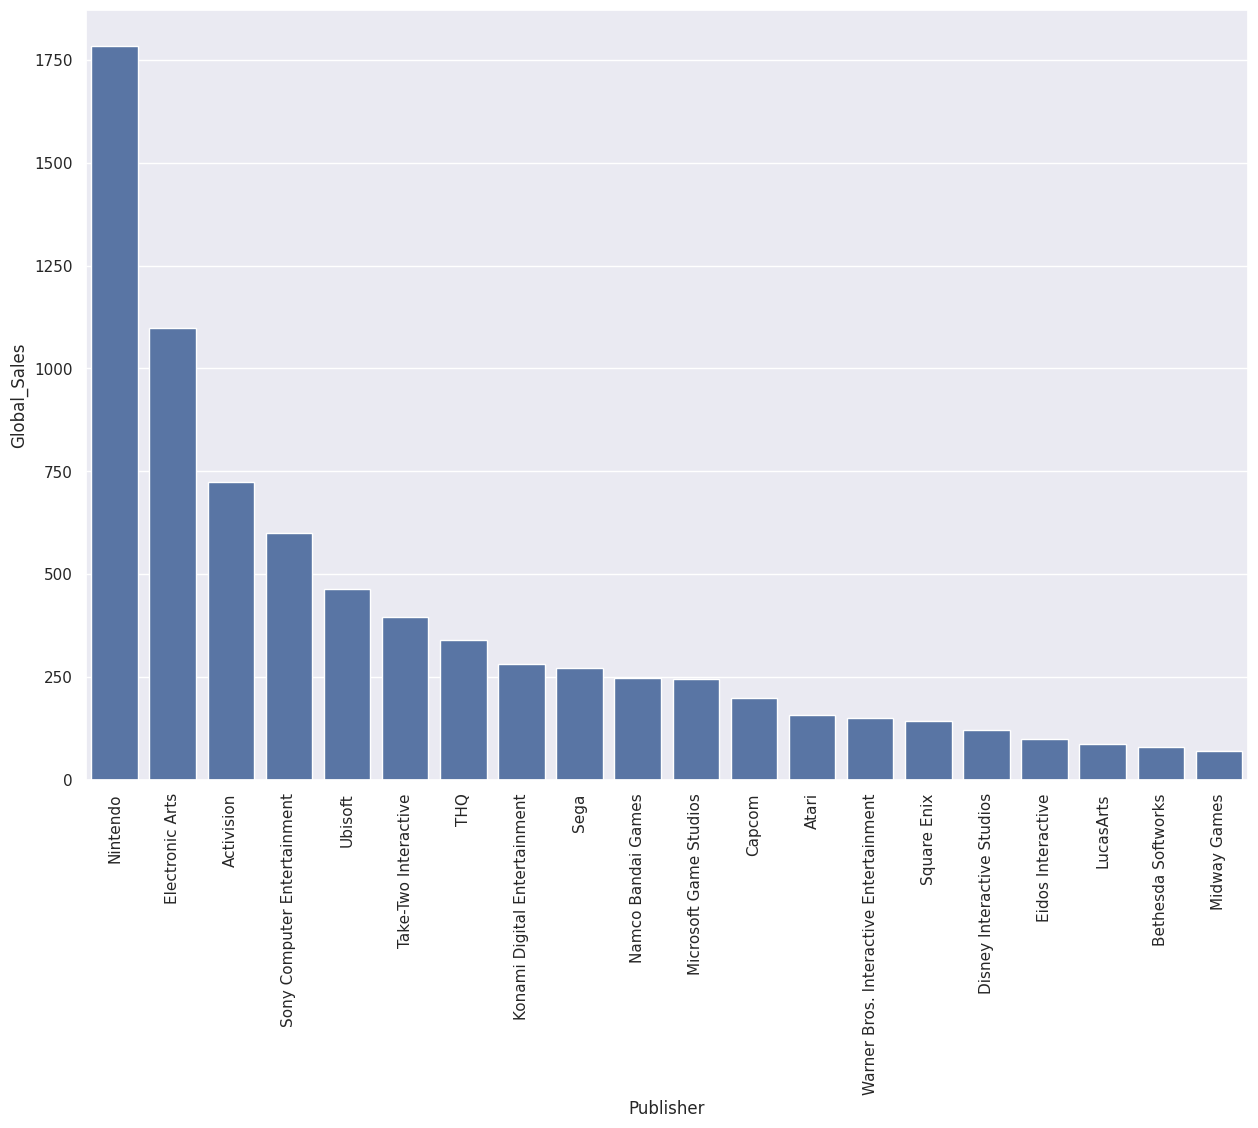

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

Nintendo kiếm được nhiều tiền hơn so với các nhà phát hành khác, nhưng họ không phát hành nhiều trò chơi nhất. Họ cũng không nằm trong top 5 nhà phát hành. Chứng tỏ game của Nitendo rất được ưa chuộng và hợp thị yếu người dùng.
*   Nintendo -> 1783.09 triệu
*   Electronic Arts -> 1098.07 triệu
*   Activision -> 723.79 triệu
*   Sony Computer Entertainment -> 600.94 triệu
*   Ubisoft -> 464.67 triệu

13. Thị phần của các nhà phát hành

In [ ]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [ ]:
comp_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
351,Nintendo,815.71,417.81,454.25,95.13,1783.09
137,Electronic Arts,591.43,364.36,13.95,128.14,1098.07
21,Activision,428.03,214.14,6.40,74.90,723.79
446,Sony Computer Entertainment,262.79,184.85,73.88,79.40,600.94
513,Ubisoft,249.31,158.94,7.26,48.96,464.67
483,Take-Two Interactive,218.66,117.52,5.81,54.80,396.65
477,THQ,208.77,94.73,5.01,32.14,340.77
269,Konami Digital Entertainment,92.15,69.21,90.67,30.24,282.43
437,Sega,109.27,81.86,56.54,24.49,272.18
339,Namco Bandai Games,67.52,41.05,124.73,14.11,247.60


In [ ]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


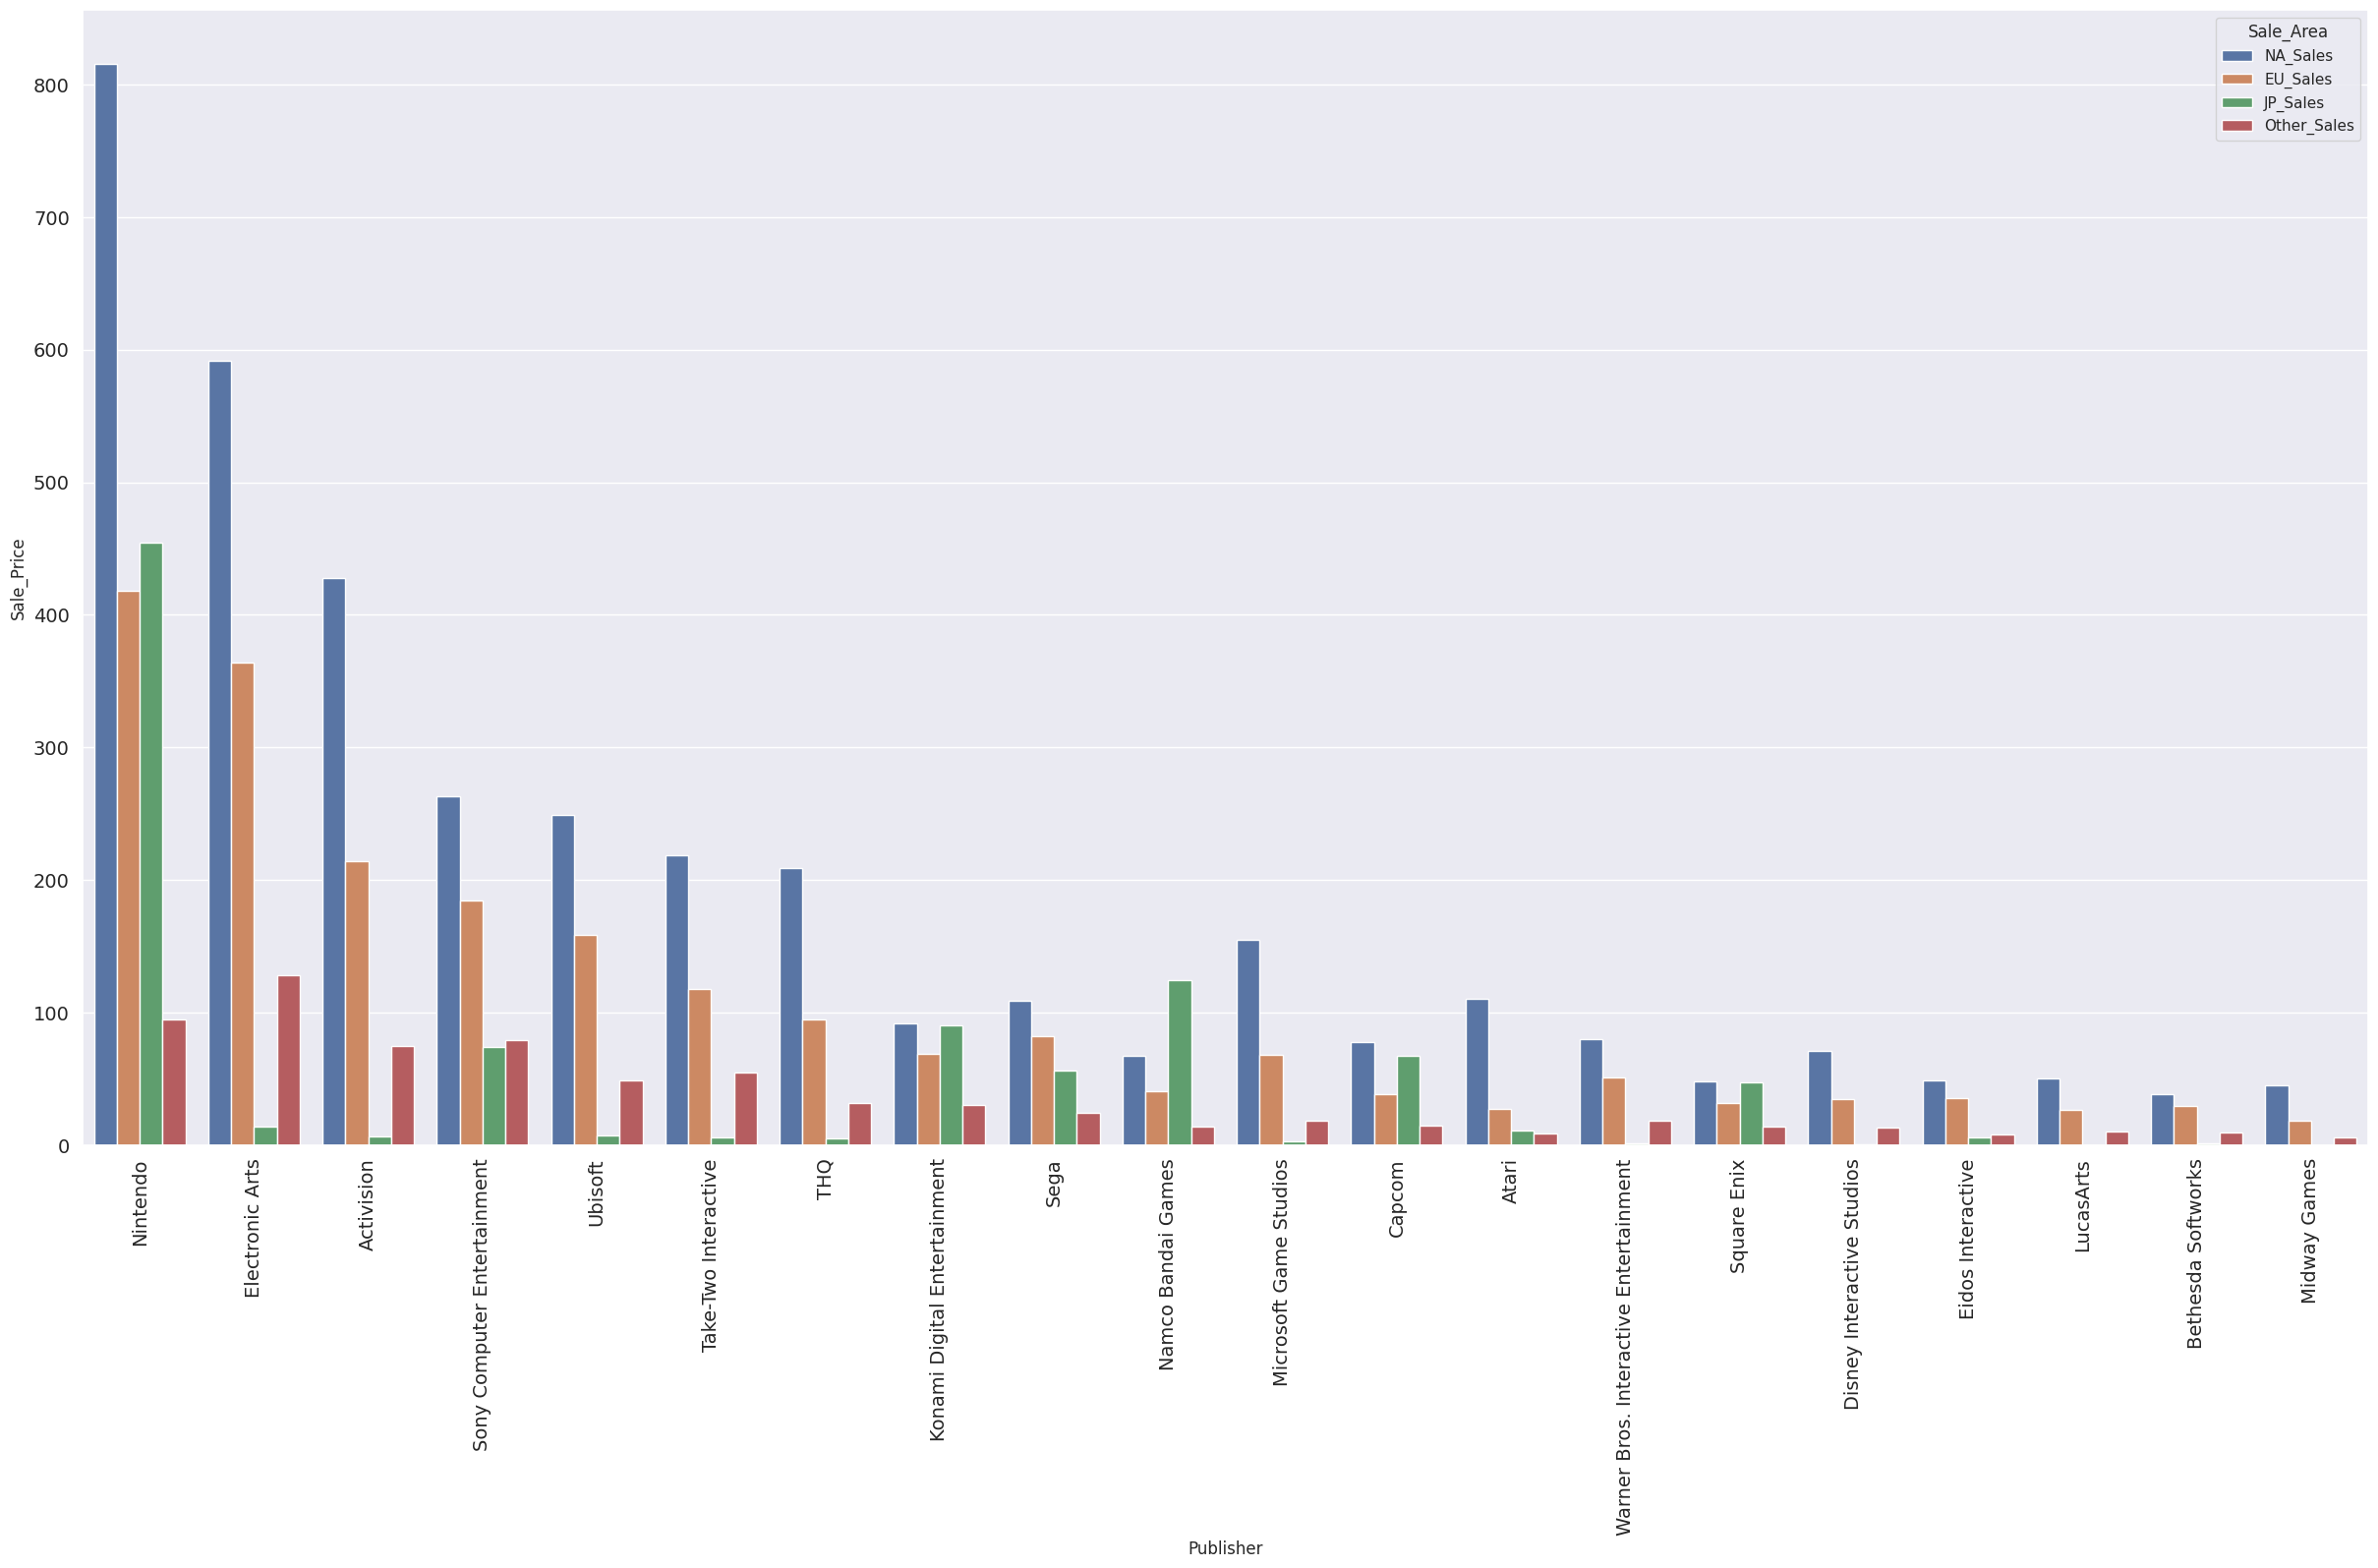

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

Nintendo có thị phần cao nhất (1783.09)  và hơn 0,25 lầm Electronic Arts ở vị trí thứ 2 (1098.07). Sau đó là những Activison (723.79), Sony (600.94), Ubisoft (464.67)… . Nintendo thể hiện được sự lớn mạnh của nhà phát hành này so với phần còn lại.                                                                            

14. Tổng doanh thu theo khu vực

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:

top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

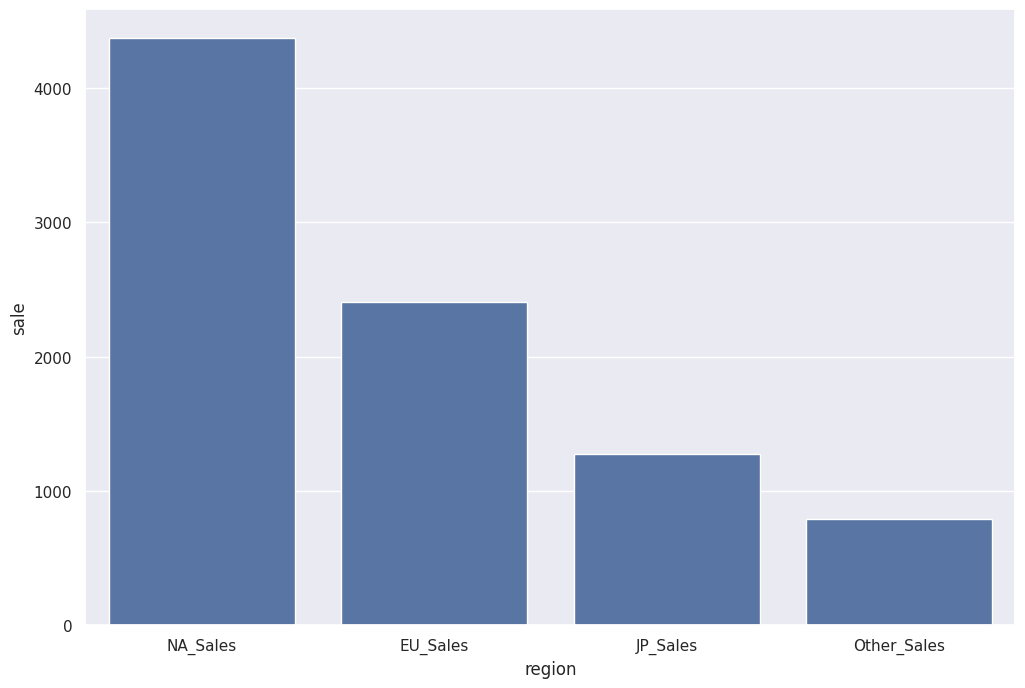

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

Khu vực Bắc Mỹ là khu vực cực kỳ quang trọng. Chiếm doanh số rất lớn của nền công nghiệp game

Biểu đồ bán hàng khu vực

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7cebdcebbee0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

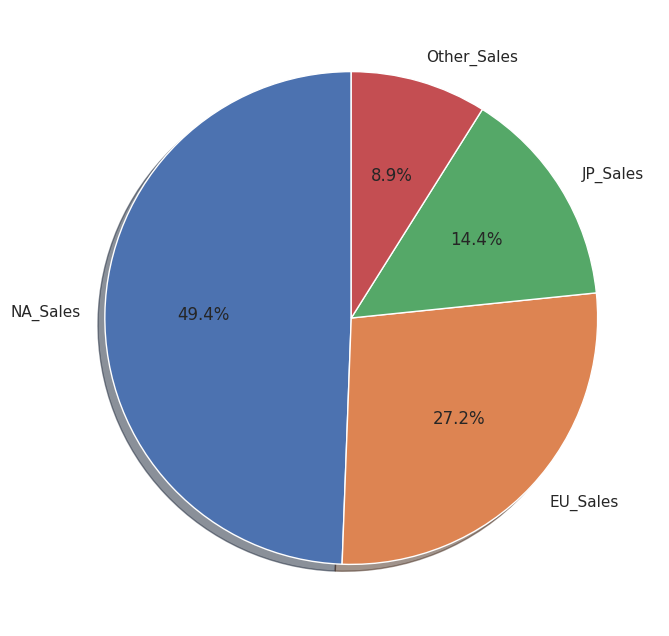

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Ta thấy được Bắc Mỹ chiếm tới gần 50% doanh thu.
Tổng doanh thu theo từng khu vực:

*   NA_Sales -> 4370.02
*   EU_Sales -> 2407.37
*   JP_Sales -> 1277.27
*   Other_Sales -> 789.98



KẾT LUẬN

Thông qua quá trình phân tích nhóm đã trả lời được rất nhiều câu hỏi liên quan về lĩnh vực bán hàng cụ thể là video games thông qua bộ dữ liệu nhóm thu thập được, đã dựa trên các biểu đồ và đánh giá theo các tiêu chí bán hàng, thị yếu người dùng. Dựa vào việc phân tích trên chúng em đưa ra những hướng phát triển cho doanh nghiệp như sau:
*   Tập trung vào phát triển các tựa game thuộc thể loại Action và Sports, cùng với việc điều chỉnh sản phẩm để phù hợp với nền tảng PS2, X360, và PS3.
*   Tận dụng thị trường Bắc Mỹ như một trọng tâm chiến lược doanh nghiệp vì thị trường này chiếm tới gần 50% doanh thu toàn cầu.
*   Nghiên cứu thị trường Nhật Bản để tận dụng sở thích ưa chuộng thể loại Role-Playing ở khu vực này.
*   Tăng cường hợp tác với các nhà phát hành lớn như Electronic Arts, Activision, và Ubisoft để tận dụng thị phần và doanh số cao.



---


Tổng quan, nhận diện kỹ lưỡng về sở thích của người chơi và điều chỉnh phản ánh của sản phẩm dựa trên dữ liệu thị trường sẽ giúp doanh nghiệp phát triển mạnh mẽ và cạnh tranh trong ngành công nghiệp game.